## NEW CONTINUING

#### Ting-Wei Shen, tis50@pitt.edu, Apr 8, 2019


### Select proper data

In [1]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
import numpy as np

In [2]:
sns.set_style('darkgrid')

In [3]:
# open pickle file

f = open('df_eli.pkl', 'rb')   # 'rb' for reading binary file
df_eli = pickle.load(f)     
f.close()

In [4]:
print(df_eli.shape)
df_eli.head()

(492, 11)


,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859
45003,ay8,5990,I was working out in the gym.GHABBAN.wav.mp3,NaN,NaN,What were you doing at 8:00 this morning?,"[I, was, working, out, in, the, gym.GHABBAN.wa...",7,"{the, was, out, in, working, gym.GHABBAN.wav.m...",7,1.000000
16101,ff4,2358,it's getting out of control. Something you sta...,Male,French,"What does the phrase ""it's getting out of hand...","[it, 's, getting, out, of, control, ., Somethi...",17,"{Something, 's, do, it, n't, control, of, out,...",15,0.882353
23749,cp5,3229,"This tree has a very rigid trunk, I can not cu...",Male,Arabic,Write an original creative sentence using a vo...,"[This, tree, has, a, very, rigid, trunk, ,, I,...",15,"{saw, has, can, not, by, ., rigid, a, trunk, t...",15,1.000000


- For assessing writing quality, we have to eliminate too short or too long essay.
- I will choose the essay tokens between 50 to 600.

In [5]:
df_eli_revised = df_eli[df_eli.token_count >= 50]
df_eli_revised = df_eli_revised[df_eli_revised.token_count <= 600]
print(df_eli_revised.shape)

(172, 11)


In [6]:
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937


- The truth is, the wild data has many defects. After proper processing, I only get 172 essays to evaluate.
- On the other hand, there are many NaN existed in the data. This is really frustrating.

In [7]:
df_native = df_eli_revised.native_language.value_counts()
df_native

Arabic        41
Korean        34
Chinese       21
Japanese       8
Spanish        8
Turkish        7
Portuguese     3
French         2
Other          2
Thai           2
Russian        1
Italian        1
Taiwanese      1
Farsi          1
Name: native_language, dtype: int64

In [8]:
sum(df_native)

132

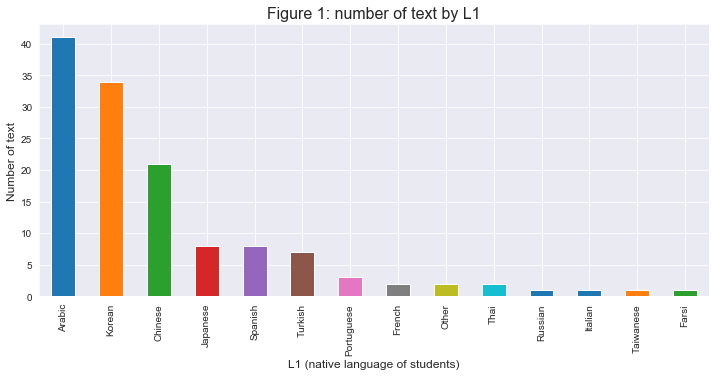

In [9]:
df_native.plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 1: number of texts by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Number of texts', fontsize=12)
plt.show()

- If we classify students by their native languages, we can find that most of them speak Arabic, Korean and Chinese.
- Pandas automatically filter NaN data, there are 132 texts left. 

In [10]:
df_gender = df_eli_revised.gender.value_counts()
df_gender

Male      70
Female    62
Name: gender, dtype: int64

In [11]:
sum(df_gender)

132

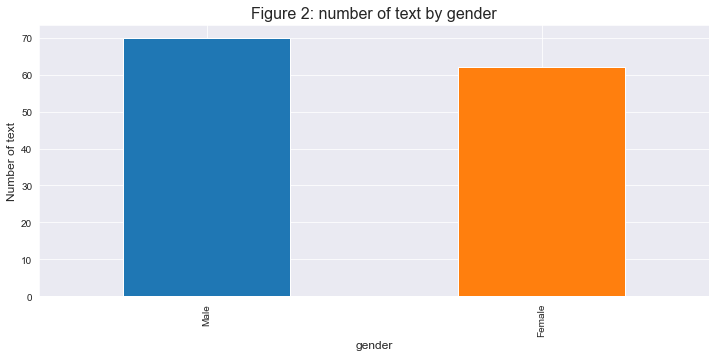

In [12]:
df_gender.plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 2: number of text by gender', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('gender', fontsize=12)
plt.ylabel('Number of text', fontsize=12)
plt.show()

- Fortunately, the gender is balanced. If we could seperate students by their gender, the result may be more reasonable.

### Linguistics Analysis

#### 1. Lexical diversity
- Type-Token ratio ( TTR )

In [13]:
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937


In [84]:
lexical_diversity = df_eli_revised[['native_language', 'TTR']].groupby('native_language').mean()
lexical_diversity

,TTR
native_language,
Arabic,0.535260
Chinese,0.588582
Farsi,0.478589
French,0.709235
Italian,0.440945
Japanese,0.609623
Korean,0.557991
Other,0.438058
Portuguese,0.465052


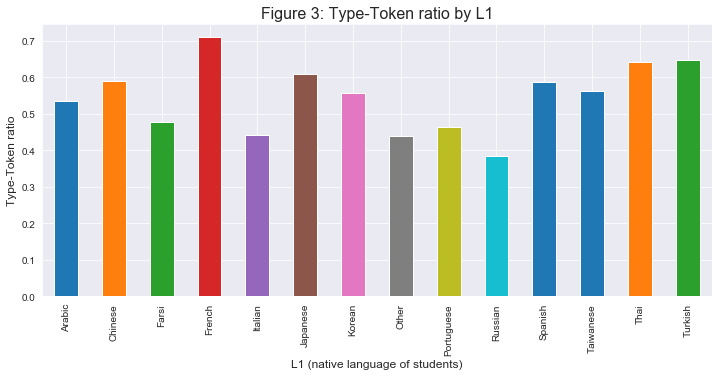

In [86]:
lexical_diversity.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 3: Type-Token ratio by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Type-Token ratio', fontsize=12)
plt.show()

- If we classified students by their native languages, the result may be baised.
- Instead, we can check about Arabic, Chinese and Korean. The order is Chinese - 0.589, Korean - 0.558 and Arabic - 0.535. Chinese may intend to use more types of words.
- How about classifying by gender? 

In [15]:
lexical_diversity_gender = df_eli_revised[['gender', 'TTR']].groupby('gender').mean()
lexical_diversity_gender

,TTR
gender,
Female,0.573227
Male,0.552312


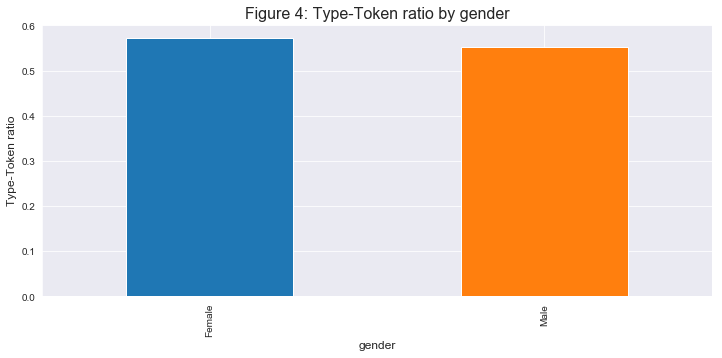

In [87]:
lexical_diversity_gender.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 4: Type-Token ratio by gender', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('gender', fontsize=12)
plt.ylabel('Type-Token ratio', fontsize=12)
plt.show()

- The result is inspiring, female students have higher TTR. They may be used to utilizing more different words.

#### 2. Syntactic complexity

- Average sentence length

In [16]:
df_eli_revised['sent_tokens'] = df_eli_revised.text.map(nltk.sent_tokenize)
df_eli_revised['sent_tokens_count'] = df_eli_revised.sent_tokens.map(len)
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR,sent_tokens,sent_tokens_count
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771,[They see the online shopping do pollution but...,6
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859,[1-Mismanagement\nSentence: So if they were no...,11
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459,"[ What I do everyday is boring., I wake up 8:...",9
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401,[Before making a decision about what I will st...,15
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937,"[ While I was living in Germany, I met my ...",5


In [17]:
sent_avg = df_eli_revised.token_count / df_eli_revised.sent_tokens_count
df_eli_revised['sent_avg'] = sent_avg
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR,sent_tokens,sent_tokens_count,sent_avg
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771,[They see the online shopping do pollution but...,6,18.166667
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859,[1-Mismanagement\nSentence: So if they were no...,11,18.000000
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459,"[ What I do everyday is boring., I wake up 8:...",9,12.111111
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401,[Before making a decision about what I will st...,15,18.266667
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937,"[ While I was living in Germany, I met my ...",5,15.800000


In [18]:
syntactic_complexity = df_eli_revised[['native_language', 'sent_avg']].groupby('native_language').mean()
syntactic_complexity

,sent_avg
native_language,
Arabic,18.735205
Chinese,16.741165
Farsi,19.850000
French,14.946429
Italian,25.400000
Japanese,16.502796
Korean,20.626358
Other,18.259259
Portuguese,20.036190


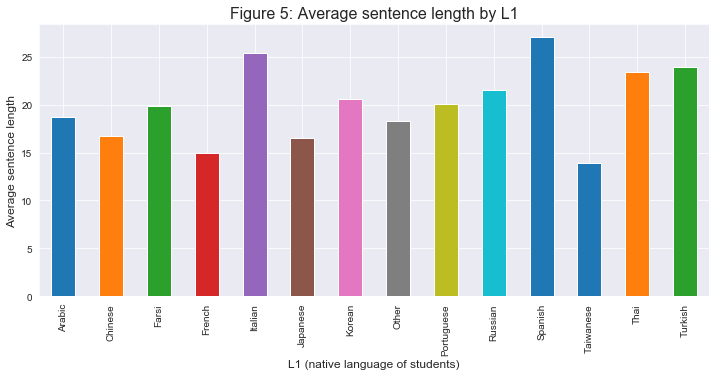

In [89]:
syntactic_complexity.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 5: Average sentence length by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Average sentence length', fontsize=12)
plt.show()

- Again, we can take a look at Arabic, Chinese and Korean. The order is Korean - 20.626, Arabic - 18.735 and Chinese - 16.741. Korean intend to make longer sentences.

In [19]:
syntactic_complexity_gender = df_eli_revised[['gender', 'sent_avg']].groupby('gender').mean()
syntactic_complexity_gender

,sent_avg
gender,
Female,19.150404
Male,20.047973


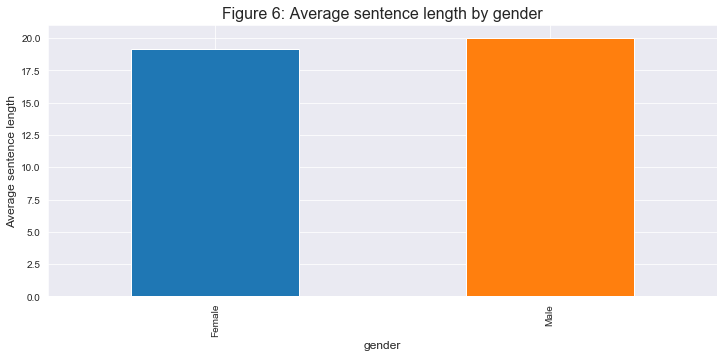

In [91]:
syntactic_complexity_gender.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 6: Average sentence length by gender', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('gender', fontsize=12)
plt.ylabel('Average sentence length', fontsize=12)
plt.show()

- The result shows that Male students intend to do longer sentences, but the difference is not obvious.

### 3. Vocabulary level
- 3a.  Average word length

In [20]:
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR,sent_tokens,sent_tokens_count,sent_avg
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771,[They see the online shopping do pollution but...,6,18.166667
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859,[1-Mismanagement\nSentence: So if they were no...,11,18.000000
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459,"[ What I do everyday is boring., I wake up 8:...",9,12.111111
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401,[Before making a decision about what I will st...,15,18.266667
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937,"[ While I was living in Germany, I met my ...",5,15.800000


In [21]:
def avg_word_length(token):

    word_length = []

    for x in token:
        word_length.append(len(x))
        
    return np.mean(word_length)

In [22]:
df_eli_revised['avg_word_length'] = df_eli_revised.tokens.map(avg_word_length)
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR,sent_tokens,sent_tokens_count,sent_avg,avg_word_length
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771,[They see the online shopping do pollution but...,6,18.166667,4.614679
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859,[1-Mismanagement\nSentence: So if they were no...,11,18.000000,4.636364
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459,"[ What I do everyday is boring., I wake up 8:...",9,12.111111,3.302752
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401,[Before making a decision about what I will st...,15,18.266667,4.072993
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937,"[ While I was living in Germany, I met my ...",5,15.800000,3.316456


In [23]:
avg_word_length = df_eli_revised[['native_language', 'avg_word_length']].groupby('native_language').mean()
avg_word_length

,avg_word_length
native_language,
Arabic,3.927877
Chinese,4.137694
Farsi,4.221662
French,4.165224
Italian,3.720472
Japanese,4.020432
Korean,3.853987
Other,3.953159
Portuguese,4.484370


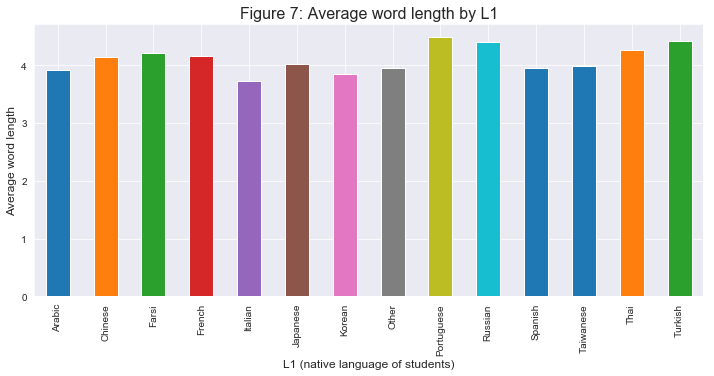

In [92]:
avg_word_length.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 7: Average word length by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Average word length', fontsize=12)
plt.show()

- The order of average word length is Chinese - 4.138, Arabic - 3.928 and Korean - 3.854. Chinese may have higher vocabulary level.

In [24]:
avg_word_length_gender = df_eli_revised[['gender', 'avg_word_length']].groupby('gender').mean()
avg_word_length_gender

,avg_word_length
gender,
Female,3.979419
Male,4.023723


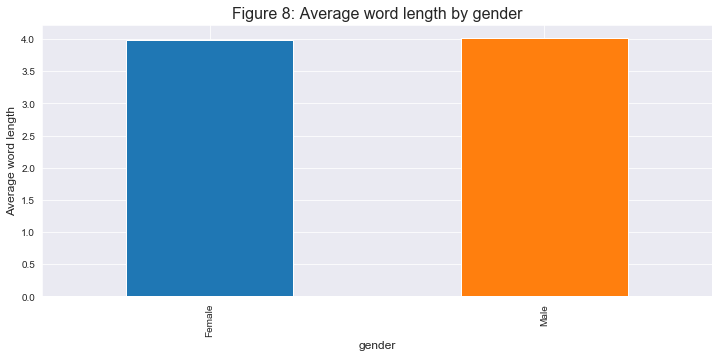

In [93]:
avg_word_length_gender.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 8: Average word length by gender', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('gender', fontsize=12)
plt.ylabel('Average word length', fontsize=12)
plt.show()

- The difference is not obvious within average word length. 

- 3b. Top most frequent English words

In [25]:
f = open('goog_kband.pkl', 'rb')
goog_kband = pickle.load(f)
f.close()

In [26]:
def avg_voc_band(token):
        
    voc_band = [goog_kband[x] for x in token if x in goog_kband]
        
    return np.mean(voc_band)

In [27]:
df_eli_revised['avg_voc_band'] = df_eli_revised.tokens.map(avg_voc_band)
df_eli_revised.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR,sent_tokens,sent_tokens_count,sent_avg,avg_word_length,avg_voc_band
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109,"{multiple, smaller, heard, do, opposed, goods,...",79,0.724771,[They see the online shopping do pollution but...,6,18.166667,4.614679,2.376344
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198,"{persuade, method, speech, The, 2, someone, wa...",116,0.585859,[1-Mismanagement\nSentence: So if they were no...,11,18.000000,4.636364,1.826087
23677,dp5,3279,What I do everyday is boring. I wake up 8:45...,Male,Korean,Be sure to write a paragraph with at least 7 s...,"[What, I, do, everyday, is, boring, ., I, wake...",109,"{homework, shower, smoke, do, same, for, of, c...",60,0.550459,"[ What I do everyday is boring., I wake up 8:...",9,12.111111,3.302752,1.828571
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401,[Before making a decision about what I will st...,15,18.266667,4.072993,1.600000
23987,ce2,3288,"While I was living in Germany, I met my f...",Male,Arabic,"Your topic sentence can be: ""I met my friend ...","[While, I, was, living, in, Germany, ,, I, met...",79,"{living, same, friend, second, of, me, things,...",47,0.594937,"[ While I was living in Germany, I met my ...",5,15.800000,3.316456,1.186441


In [28]:
avg_voc_band = df_eli_revised[['native_language', 'avg_voc_band']].groupby('native_language').mean()
avg_voc_band

,avg_voc_band
native_language,
Arabic,1.748736
Chinese,1.879797
Farsi,2.377049
French,1.817873
Italian,1.488506
Japanese,1.987135
Korean,1.957680
Other,1.996413
Portuguese,2.210521


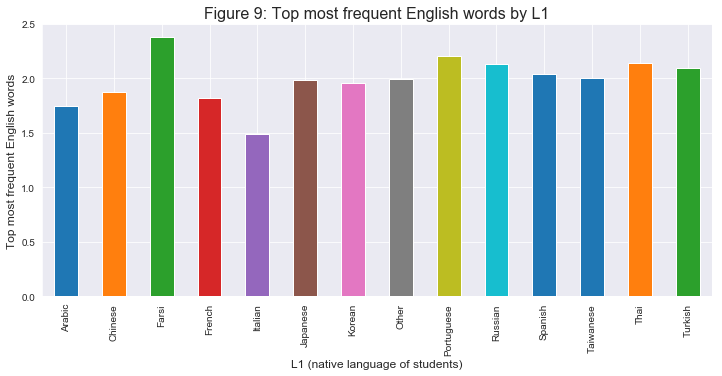

In [94]:
avg_voc_band.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 9: Top most frequent English words by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Top most frequent English words', fontsize=12)
plt.show()

- With higher value, students tend to write more sophisticated words. Select Arabic, Chinese and Korean, the order is Korean - 1.958, Chinese - 1.880 and Arabic - 1.749. Korean tend to write more sophisticated words.

In [29]:
avg_voc_band_gender = df_eli_revised[['gender', 'avg_voc_band']].groupby('gender').mean()
avg_voc_band_gender

,avg_voc_band
gender,
Female,1.941454
Male,1.868640


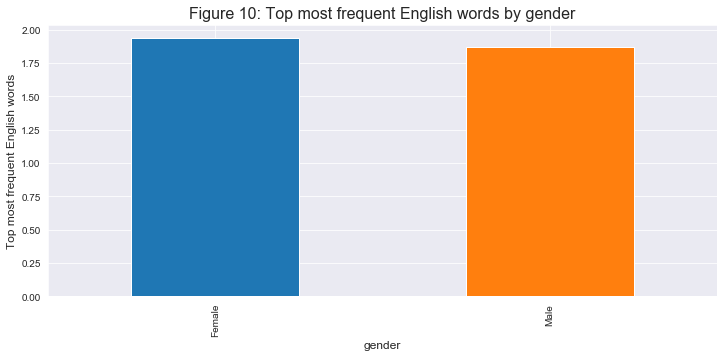

In [95]:
avg_voc_band_gender.iloc[:,0].plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 10: Top most frequent English words by gender', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('gender', fontsize=12)
plt.ylabel('Top most frequent English words', fontsize=12)
plt.show()

- Female students tend to write more sophisticated words.

### Apply spell checker
- Peter Norvig python module
- For the basic principle, we can check about the [spell.ipynb](https://github.com/Data-Science-for-Linguists-2019/Spell-Checker/blob/master/spell.ipynb) file.

In [31]:
from spell import correction

In [32]:
correction('spellin')

'spelling'

- On the other hand, we can use the module that is already created.
- This module is still based on Peter Norvig python module.

In [35]:
!pip install pyspellchecker

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [73]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one 'most likely' answer
    print('misspelling words: ', word)
    print('corrected words: ', spell.correction(word))
    print()
    
    # Get a list of 'likely' options
    print('candidate words: ', spell.candidates(word))

mispelling words:  hapenning
corrected words:  happening

candidate words:  {'happening', 'henning', 'penning'}


In [75]:
# find those words that may be misspelled
misspelled = spell.unknown(df_eli_revised.iloc[1, 6])

for word in misspelled:
    # Get the one 'most likely' answer
    print('misspelling words: ', word)
    print('corrected words: ', spell.correction(word))
    print()
    
    # Get a list of 'likely' options
    print('candidate words: ', spell.candidates(word))
    print('-------------------------------')

mispelling words:  2-demonstration
corrected words:  demonstration

candidate words:  {'demonstration'}
-------------------------------
mispelling words:  1-mismanagement
corrected words:  mismanagement

candidate words:  {'mismanagement'}
-------------------------------
mispelling words:  e.x
corrected words:  e.

candidate words:  {'ex.', 'e.g', 'e.', 'e.r', 'e.h', 'ex'}
-------------------------------
mispelling words:  3-orgainaize
corrected words:  3-orgainaize

candidate words:  {'3-orgainaize'}
-------------------------------
mispelling words:  crowly
corrected words:  crowley

candidate words:  {'crowley'}
-------------------------------
mispelling words:  5-religious
corrected words:  religious

candidate words:  {'irreligious', 'religious'}
-------------------------------
mispelling words:  .that
corrected words:  that

candidate words:  {'that'}
-------------------------------
mispelling words:  4-disagreement
corrected words:  disagreement

candidate words:  {'disagreement'

- It looks like the model select the wrong target words. Let's look at the questions students were asked. 

In [52]:
print(df_eli_revised.iloc[1, 5].replace('\n', ''))  # the question
print()
print(df_eli_revised.iloc[1, 2])  # the text

For each of the following words, write the sentence in which the word is found in Reading 6, the part of speech, and the dictionary definition.1.  mismanagement 2.  demonstration3.  organize4.  disagreement5.  religious6.(Your own word)

1-Mismanagement
Sentence: So if they were nominated there would be no question of mismanagement of funds.
Part of speech: Noun
Definition: he is in charge financial. 
2-Demonstration
Sentence: In fact, they claim that Victor was helping to organize a demonstration against the employment policies of Crowly Engineering. 
Part of speech: Noun
Definition: An action, fact, etc .that proves that someone or something has particular quality, ability, emotion, etc.
3-Orgainaize
Sentence: E.X. 2
Part of speech: Verb
Definition: To form UNION or persuade people to join one.
4-Disagreement
Sentence: Mr. Crowly and his son, Victor had some very public disagreements on the construction of government housing for the poor.
Part of speech: Noun
Definition: A situation 

- This is not a real essay, it is likely the definition of words. The spell checker detects the words which are not our target. 
- How about narrowing down the scope of the text? We can choose essays only.

In [57]:
df_eli_250 = df_eli[df_eli.token_count >= 250]
df_eli_250 = df_eli_250[df_eli_250.token_count <= 400]
print(df_eli_250.shape)

(22, 11)


In [58]:
df_eli_250.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count,types,type_count,TTR
39150,gw1,5238,Before making a decision about what I will stu...,Male,Arabic,Acknowledge Ambiguous Crucial Compensat...,"[Before, making, a, decision, about, what, I, ...",274,"{Aziz, understand, chance, thinking, The, me, ...",133,0.485401
17249,dd4,2499,I think that one of the most important decisio...,Female,Italian,Question 1\nThink of an important decision you...,"[I, think, that, one, of, the, most, important...",254,"{do, me, met, taking, finally, believe, many, ...",112,0.440945
37083,db5,5030,\n NOWRUZ HOLI...,Male,Farsi,Post your 'Process Essay' here. Remember to r...,"[NOWRUZ, HOLIDAY, We, have, a, fantastic, holi...",397,"{rice, shopping, chance, The, me, days, agree,...",190,0.478589
7120,ac3,1092,Do not disclose too much personal information ...,Female,Chinese,What do you think of Dr. Schwartz's advice? C...,"[Do, not, disclose, too, much, personal, infor...",259,"{whole, do, authenticity, second, chance, foll...",121,0.467181
22682,gj2,3077,Insomnia is a sleeping disorder characteri...,Male,Arabic,Write the first draft of your problem/solution...,"[Insomnia, is, a, sleeping, disorder, characte...",370,"{cases, recommendation, tried, method, its, la...",215,0.581081


In [62]:
print(df_eli_250.iloc[0, 5])  # the question
print('-----------------------'
print(df_eli_250.iloc[0, 2])  # the text

Acknowledge  Ambiguous    Crucial    Compensate         Abstract     Attribute    Philosophy
Generate     Arbitrary    Inherent
                                
In your Essay, please HIGHLIGHT the vocabulary words you have chosen.
-----------------------
Before making a decision about what I will study, I thought it was very difficult decision and not easy, because I didn't have any trend or philosophy about any things. In the same time, Having depended on it and my dream will be truth, it is very a crucial decision. I wanted to ask my parents about it what they wanted me to become. They told me that think about your ability and about your future and try to generate something will help people in all life. I started thinking about something is will help humanity in different aspects. I decided to ask some friends who are closed from me. Some of them gave me ambiguous opinion that is difficult to understand other told me that I should study in medical field. When I was in high school, so

In [64]:
print(df_eli_250.iloc[1, 5])  # the question
print('-----------------------')
print(df_eli_250.iloc[1, 2])  # the text

Question 1
Think of an important decision you have made in your life. What was that decision?   What would've happened if you had made a different decision? How would your life be different now?  Are you happy you made the decision, or do you wish you that you had made a different decision?

Use at least 4 conditional statements.  Extra credit:  use 1 wish statement.
-----------------------
I think that one of the most important decision I've made in my life was the choice of the University. 
When I graduated from Hight School I was 18 years old and I was confused about my future. My father wanted me to become an engineer, but my dream was to become a medical doctor. I thought a lot before taking that decision, but finally I decided to start the School of Medicine.

I'm sure I've made the right choice, but sometimes I wish I could know what would've happened if I had made a different decision.

If I were an engineer, I wouldn't know too many things about diseases and maybe I would be l

In [65]:
print(df_eli_250.iloc[2, 5])  # the question
print('-----------------------')
print(df_eli_250.iloc[2, 2])  # the text

Post your 'Process Essay' here.  Remember to remove your name and single space your work before you submit it.
-----------------------

                                 NOWRUZ HOLIDAY 
        We have a fantastic holiday in my country called Nowruz. This holiday is at the beginning of spring, and it is thirteen days long. Before Nowruz people go shopping to buy fruits, nuts and pies. They also shop for new clothes and acquire gifts for the youngsters. Obviously, Nowruz is the most wonderful holiday for Iranian people because they meet their relatives, start a new year and eat tasty and delicious foods. 
     First, Nowruz is a great occasion in Iran because people meet their relatives and say Happy New Year to each other. In addition, people receive their guests with nuts, pastries and fruits such as pistachio and baklava. Furthermore, they review their old memories and tell teenagers stories about their life experiences. In addition, adults either buy presents or give money to young c

- Great! These essays looks like what we want.
- Try again with spell checker model.

In [76]:
# find those words that may be misspelled
misspelled = spell.unknown(df_eli_250.iloc[0, 6])

for word in misspelled:
    # Get the one 'most likely' answer
    print('misspelling words: ', word)
    print('corrected words: ', spell.correction(word))
    print()
    
    # Get a list of 'likely' options
    print('candidate words: ', spell.candidates(word))
    print('-------------------------------')

misspelling words:  'll
corrected words:  all

candidate words:  {'all', 'ell', 'rll', 'ill', 'cll', 'll'}
-------------------------------


In [77]:
# find those words that may be misspelled
misspelled = spell.unknown(df_eli_250.iloc[1, 6])

for word in misspelled:
    # Get the one 'most likely' answer
    print('misspelling words: ', word)
    print('corrected words: ', spell.correction(word))
    print()
    
    # Get a list of 'likely' options
    print('candidate words: ', spell.candidates(word))
    print('-------------------------------')

misspelling words:  's
corrected words:  is

candidate words:  {'bs', 'cs', 'ks', 'qs', 'vs', "f's", 'ps', 'os', "n's", 'fs', "d's", "u's", 'xs', "v's", 'is', 'ms', "c's", "e's", "l's", 'ws', "i's", 'us', "s'", 'ys', "o's", "m's", "p's", 'ss', 'ls', "s's", "y's", "x's", 's', "t's", 'rs', "'", 'ds', "g's", 'es', 'ts', "q's", "j's", 'js', 'hs', "a's", "w's", 'gs', 'ns', 'as', "k's", "b's", "z's", "r's"}
-------------------------------
misspelling words:  've
corrected words:  eve

candidate words:  {'ive', 'eve', 'rve', 'ave', 've', 'ove'}
-------------------------------
misspelling words:  'm
corrected words:  mm

candidate words:  {"c'm", 'sm', 'mm', 'lm', 'pm', 'cm', 'qm', 'bm', 'wm', 'vm', "m'", 'hm', 'xm', 'am', 'em', 'om', 'dm', 'tm', 'rm', "'", 'fm', 'jm', 'km', 'im', 'nm', 'gm', 'm', 'um'}
-------------------------------
misspelling words:  ''
corrected words:  d'

candidate words:  {"n'", "d'", "e'", "a'", "y'", "j'", "p'", "t'", "s'", "r'", "m'", "'", "f'", "c'", "o'", "i'", "q

- Most of the targets are from the contraction of two words, for example: "'s", "'ve", "'m" etc. In this case, we need the data that is pre-processed and without the contraction. Otherwise, after nltk.word_tokenize(txt) and spell checker processed, we may get the wrong correction.

In [78]:
# find those words that may be misspelled
misspelled = spell.unknown(df_eli_250.iloc[2, 6])

for word in misspelled:
    # Get the one 'most likely' answer
    print('misspelling words: ', word)
    print('corrected words: ', spell.correction(word))
    print()
    
    # Get a list of 'likely' options
    print('candidate words: ', spell.candidates(word))
    print('-------------------------------')

misspelling words:  nowruz
corrected words:  nowruz

candidate words:  {'nowruz'}
-------------------------------
misspelling words:  quran
corrected words:  duran

candidate words:  {"qur'an", 'qumran', 'duran'}
-------------------------------
misspelling words:  baklava
corrected words:  baklava

candidate words:  {'baklava'}
-------------------------------


- In this case, the essay has many proper nouns. They will be detected as misspelling words and be corrected as the original words. This process is acceptable. However, there is still some exception like 'quran', the model corrects it as 'duran'. If we wanted to add this word, we can use spell.word_frequency.load_words(['txt']) to add proper nouns.

In [80]:
spell.word_frequency.load_words(['quran'])

# find those words that may be misspelled
misspelled = spell.unknown(df_eli_250.iloc[2, 6])

for word in misspelled:
    # Get the one 'most likely' answer
    print('misspelling words: ', word)
    print('corrected words: ', spell.correction(word))
    print()
    
    # Get a list of 'likely' options
    print('candidate words: ', spell.candidates(word))
    print('-------------------------------')

misspelling words:  nowruz
corrected words:  nowruz

candidate words:  {'nowruz'}
-------------------------------
misspelling words:  baklava
corrected words:  baklava

candidate words:  {'baklava'}
-------------------------------


- Then, we can get the better result. 

### Summary

- In general, there are not many misspellings in the data. That may be caused by students have less error in the writing material.
- The spell checker (by Peter Norvig) still has many restriction on data. The performance will be influenced by the dictionary and tokenized words. We need to choose the proper dictionary corresponding to our data. 
- This model may be more suitable to the speaking data which are written as the texts. The data may contains more spelling error than writing materials.
- It may not be proper to replace the data we have now with the words that this spell checker model recommend. 